In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

## Loading the data

#### Track coordinates

In [73]:
track = pd.read_csv('data/CA1_6_1_track.csv', header=None) # coordinates
track.columns = ['time', 'x', 'y']
track.set_index('time', inplace=True)
track.index = (track.index * 20).astype(np.int32)
track.head()

,x,y
time,,
1,-10.618986,1.045508
2,-11.600195,1.371564
3,-12.577124,1.717142
4,-13.551862,2.083993
5,-14.512914,2.497923


### Neuropil

In [232]:
neuropil = pd.read_csv('data/CA1_6_1_neuropil.csv', header=None, index_col=0) # neurons
neuropil.index.names = ['time']
neuropil.index = (neuropil.index * 20).astype(np.int32)

# making it match fine_cells
neuropil.columns = (neuropil.columns - 1).astype(str) + 'N' # to differentiate it from a number

# aligning the rows to match track and fine_cells
neuropil = neuropil.loc[647:, :].reset_index()
neuropil['time'] = neuropil['time'] - 646
neuropil.set_index('time', inplace=True)

neuropil.head()

,0N,1N,2N,3N,4N,5N,6N,7N,8N,9N,...,580N,581N,582N,583N,584N,585N,586N,587N,588N,589N
time,,,,,,,,,,,,,,,,,,,,,
1,-0.002934,-0.002239,0.000845,-0.000191,0.018179,0.002266,-0.001677,-0.000652,-0.002532,-0.005300,...,0.009806,-0.003243,-0.002325,-0.000460,0.005267,0.008778,0.008849,0.003470,0.001455,-0.002240
2,-0.004061,-0.003564,0.002370,-0.003619,0.017365,-0.000518,-0.001709,-0.004011,-0.004835,-0.002587,...,0.007742,-0.002837,-0.001337,-0.000094,0.003998,0.009368,0.009396,0.003687,-0.001638,-0.001919
3,-0.002164,-0.002635,0.000981,-0.001702,0.017278,0.002372,-0.002508,-0.003894,-0.001754,-0.005893,...,0.005949,-0.001452,-0.000011,-0.000207,0.006297,0.009328,0.006953,0.003336,0.000240,-0.003030
4,-0.003558,-0.005556,0.000519,-0.002884,0.013902,0.003492,-0.002478,-0.004923,-0.004490,-0.003553,...,0.009733,-0.002536,0.001108,0.000418,0.007100,0.011831,0.007619,0.004714,-0.002084,-0.002159
5,-0.004191,-0.003141,0.002763,-0.002097,0.015821,0.006337,0.000688,-0.005050,-0.003774,-0.004155,...,0.007605,-0.003587,-0.000978,-0.000112,0.004959,0.006470,0.007963,0.006876,-0.001403,-0.002426


### Fine (not) cells

In [233]:
fine_cells = pd.read_csv('data/CA1_6_1_fine_cells.csv', index_col=0)
#fine_cells.rename(columns={"time,s\cell#": "time"}, inplace=True)
#fine_cells.set_index('time', inplace=True)
fine_cells.index.names = ['time']
fine_cells.index = (fine_cells.index * 20).astype(np.int32)
fine_cells.columns = fine_cells.columns.astype(str) + 'N'
fine_cells.head()

,4N,69N,92N,116N,123N,128N,136N,143N,147N,153N,...,188N,192N,208N,231N,273N,354N,408N,543N,570N,577N
time,,,,,,,,,,,,,,,,,,,,,
1,0.018179,-0.024777,-0.006565,-0.012388,-0.008887,-0.012914,-0.015549,-0.006735,-0.012197,-0.018785,...,0.009529,-0.001906,0.043256,-0.005412,-0.001835,-0.004913,-0.006586,-0.005296,-0.007407,-0.002616
2,0.017365,-0.022071,-0.006246,-0.013401,-0.006372,-0.013255,-0.017807,-0.006125,-0.013311,-0.018717,...,0.012430,-0.000354,0.042603,-0.005423,-0.003040,-0.003705,-0.006257,-0.005749,-0.007352,-0.003265
3,0.017278,-0.022216,-0.004703,-0.009781,-0.005761,-0.011657,-0.013116,-0.010442,-0.011870,-0.017295,...,0.012656,0.001288,0.041309,-0.003618,-0.000195,-0.001868,-0.005974,-0.005802,-0.004829,-0.003245
4,0.013902,-0.021415,-0.003486,-0.010803,-0.003996,-0.014408,-0.015875,-0.009822,-0.010226,-0.019532,...,0.010340,0.001612,0.043249,-0.006278,-0.001035,-0.006251,-0.006020,-0.005568,-0.006260,-0.003475
5,0.015821,-0.022920,-0.000751,-0.011077,-0.001041,-0.012884,-0.014639,-0.008761,-0.013454,-0.017255,...,0.007611,0.005419,0.039358,-0.004703,-0.001926,-0.006696,-0.008204,-0.004500,-0.004808,-0.002429


### Joining cells data with track

In [234]:
track.shape, neuropil.shape, fine_cells.shape

((6124, 2), (6124, 590), (6124, 24))

In [235]:
df = neuropil.join(track, how='inner')

# WARNING: transposed version
df.head().T

time,1,2,3,4,5
0N,-0.002934,-0.004061,-0.002164,-0.003558,-0.004191
1N,-0.002239,-0.003564,-0.002635,-0.005556,-0.003141
2N,0.000845,0.002370,0.000981,0.000519,0.002763
3N,-0.000191,-0.003619,-0.001702,-0.002884,-0.002097
4N,0.018179,0.017365,0.017278,0.013902,0.015821
...,...,...,...,...,...
587N,0.003470,0.003687,0.003336,0.004714,0.006876
588N,0.001455,-0.001638,0.000240,-0.002084,-0.001403
589N,-0.002240,-0.001919,-0.003030,-0.002159,-0.002426
x,-10.618986,-11.600195,-12.577124,-13.551862,-14.512914


## Auxillary functions

In [236]:
def get_segment(coordinates, cx = 0, cy = 0, n=10):
    """
    Returns a segment of a circle centered at (cx, cy)

    Parameters
    ----------
    coordinates : {x, y}
        coordinates of a point
    cx : float
        x of the circle's center
    cy : float
        y of the circle's center
    n : int
        number of segments

    Returns
    -------
    int
        i-th segment corresponding to the given coordinates

    """
    segment = 360 / n
    return (np.angle((coordinates['x'] - cx) + 1j * (coordinates['y'] - cy), deg=True)+360) % 360 // segment


def acc_1(y_pred, y_true):
    # simple accuracy
    return np.sum(y_pred == y_true) / len(y_true)

# TODO fix
def acc_3(y_pred, y_true, n=10):
    # 3-accuracy
    return np.sum(np.logical_or(np.abs(y_pred - y_test) <= 1., np.abs(y_pred - y_test) == n-1)) / len(y_true)

In [237]:
from math import pi
from math import cos, sin
def generate_xy(center, radius, n=100):
    """
    returns a list of n coordinates of a circle on xy plane

    Parameters
    ----------
    center : (x, y)
        center of the circle
    radius : float
        radius of the circle
    n : int
        number of points

    Returns
    -------
    list
        coordinates of the circle on xy plane (x, y)

    """
    a = [] # the resulting array
    delta = 2 * pi / n
    angles = np.arange(0, 2 * pi, delta)
    for phi in angles:
        x = radius * cos(phi) + center[0]
        y = radius * sin(phi) + center[1]
        a.append((x, y))
    return a

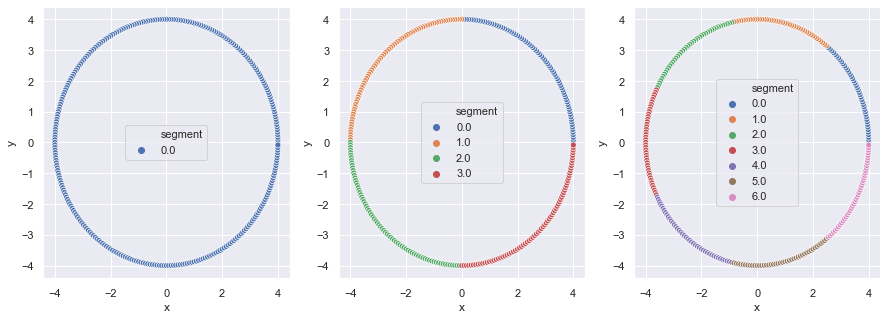

In [238]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=3)


for i in range(1, 10, 3):
    generated_circle = pd.DataFrame(generate_xy((0, 0), 4, n=300),columns=['x','y'])
    generated_circle['segment'] = get_segment(generated_circle, n=i)
    generated_circle['segment'] = generated_circle['segment'].astype('category')
    sns.scatterplot(x='x', y='y', hue='segment', data=generated_circle, ax=ax[(i-1) // 3])

## Getting the coordinates of the circle

In [239]:
x_max, y_max = df[['x', 'y']].max()
x_min, y_min = df[['x', 'y']].min()

radius_x = (x_max - x_min) / 2
radius_y = (y_max - y_min) / 2
radius = (radius_x+radius_y)/2

cx1 = x_max - radius
cx2 = x_min + radius
cx = (cx1 + cx2) / 2
cy1 = y_max - radius
cy2 = y_min + radius
cy = (cy1 + cy2) / 2

## Splitting the circle into segments

In [240]:
NUM_SEGMENTS=10

In [241]:
df['segment'] = get_segment(df, n=NUM_SEGMENTS)
df['segment'] = df['segment'].astype('category') # for better visualization

### Generating a circle

In [242]:
generated_circle = pd.DataFrame(generate_xy((0, 0), 4, n=300),columns=['x','y'])
generated_circle['segment'] = get_segment(generated_circle, n=NUM_SEGMENTS)
generated_circle['segment'] = generated_circle['segment'].astype('category')

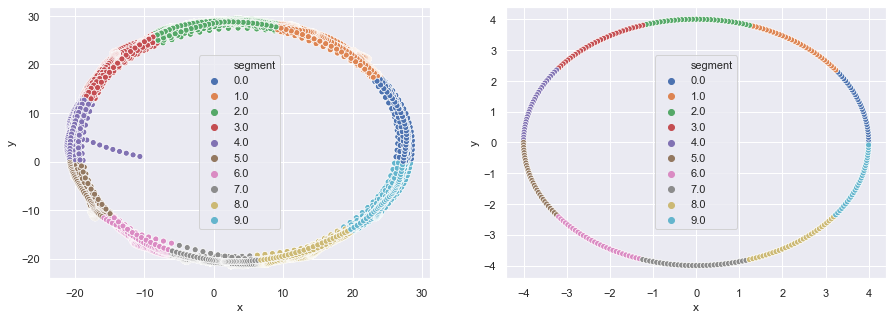

In [243]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)

sns.scatterplot(x='x', y='y', hue='segment', data=df, ax=ax[0])
sns.scatterplot(x='x', y='y', hue='segment', data=generated_circle, ax=ax[1]);

In [244]:
# ??? where did it come from
df[(df['x'] < -10) & (df['x'] > -15) & (df['y'] > 0) & (df['y'] < 5)]

,0N,1N,2N,3N,4N,5N,6N,7N,8N,9N,...,583N,584N,585N,586N,587N,588N,589N,x,y,segment
time,,,,,,,,,,,,,,,,,,,,,
1,-0.002934,-0.002239,0.000845,-0.000191,0.018179,0.002266,-0.001677,-0.000652,-0.002532,-0.005300,...,-0.000460,0.005267,0.008778,0.008849,0.003470,0.001455,-0.002240,-10.618986,1.045508,4.0
2,-0.004061,-0.003564,0.002370,-0.003619,0.017365,-0.000518,-0.001709,-0.004011,-0.004835,-0.002587,...,-0.000094,0.003998,0.009368,0.009396,0.003687,-0.001638,-0.001919,-11.600195,1.371564,4.0
3,-0.002164,-0.002635,0.000981,-0.001702,0.017278,0.002372,-0.002508,-0.003894,-0.001754,-0.005893,...,-0.000207,0.006297,0.009328,0.006953,0.003336,0.000240,-0.003030,-12.577124,1.717142,4.0
4,-0.003558,-0.005556,0.000519,-0.002884,0.013902,0.003492,-0.002478,-0.004923,-0.004490,-0.003553,...,0.000418,0.007100,0.011831,0.007619,0.004714,-0.002084,-0.002159,-13.551862,2.083993,4.0
5,-0.004191,-0.003141,0.002763,-0.002097,0.015821,0.006337,0.000688,-0.005050,-0.003774,-0.004155,...,-0.000112,0.004959,0.006470,0.007963,0.006876,-0.001403,-0.002426,-14.512914,2.497923,4.0


In [245]:
# just dropping that tail
df = df.drop(range(1, 6))
fine_cells = fine_cells.drop(range(1, 6))

## Mutual Information
TODO use simple linear regression?

just use sklearn.feature_selection

In [246]:
from sklearn.metrics import mutual_info_score

### preparing the data

In [247]:
X = df.drop(['x', 'y', 'segment'], axis='columns').copy()
y = df['segment'].copy()

In [248]:
# TODO try different discrete variable
for col in X.columns:
    quantiles = [X[col].quantile(q) for q in np.arange(0, 1, 0.1)]
    batches = np.zeros(len(y)).astype(int)
    for q in quantiles:
        batches += (X[col] - q >= 0)
    X[col] = batches

In [261]:
mis = X.apply(lambda col: mutual_info_score(col, y) / np.log(2), axis=0).copy()
mis = mis.sort_values(ascending=False)

In [262]:
mis = pd.DataFrame({'neuron': mis.index, 'score':mis})
mis['neuron'] = mis['neuron'].astype(str)

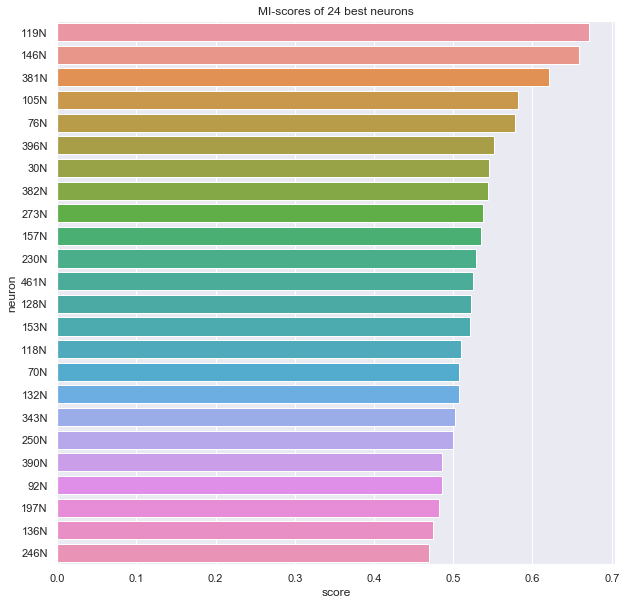

In [264]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1)

ax = sns.barplot(x='score', y='neuron', data=mis[:24], ax=ax);
ax.set_title("MI-scores of 24 best neurons");

### Comparing the obtained neurons with manually selected ones

In [271]:
fine_neurons = fine_cells.columns
best_neurons = mis[:24]['neuron']
worst_neurons = mis[-24:]['neuron']

set(fine_neurons).intersection(best_neurons)

{'128N', '136N', '153N', '273N', '92N'}